## MNIST Classification using Deep learning algorithm

<br>
<B>
This algorithm takes input as handwritten digits and convert them to digits 0-9. The data set is available in keras dataset and has about 70000 records. 
Matplotlib is used to draw visualisations for the digits.
<br>
Finally we are using seaborn's heatmap functionality to visualise our predicted output.

### Import required libraries 

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


### Loading dataset.
<I> The data set is divided in train and test. So we need not split it.

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

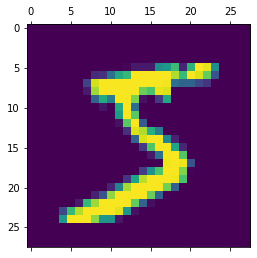

In [33]:
plt.matshow(X_train[0])

In [36]:
plt.savefig('Churn.png')

<Figure size 432x288 with 0 Axes>

In [9]:
y_train[0]

5

### Feature Scaling

In [10]:
X_train=X_train/255
X_test=X_test/255

In [11]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### Creating keras sequential model with one layer only and selecting optimizer. 
<b> Fit data to model by selecting some number for epochs.

In [12]:
model=keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    keras.layers.Dense(10,input_shape=(784,), activation='sigmoid')
])
model.compile(optimizer='adam', 
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 3ms/step - loss: 0.7159 - accuracy: 0.8142
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3152 - accuracy: 0.9112
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2784 - accuracy: 0.9219
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2669 - accuracy: 0.9249
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2658 - accuracy: 0.9245


### Evaluation of model

In [13]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 3ms/step - loss: 0.2737 - accuracy: 0.9231


[0.2736893892288208, 0.9230999946594238]

In [14]:
y_predicted=model.predict(X_test)
y_predicted[0]

array([3.4322858e-02, 3.2550184e-07, 5.1971704e-02, 9.5056951e-01,
       2.6316345e-03, 1.4802739e-01, 1.9815109e-06, 9.9976480e-01,
       8.0408245e-02, 6.9757164e-01], dtype=float32)

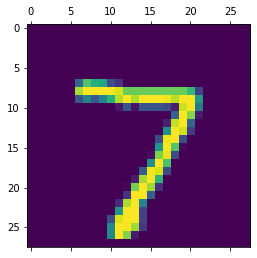

In [15]:
plt.matshow(X_test[0])

In [16]:
np.argmax(y_predicted[0])

7

### Changing predicted output values to required format 

In [17]:
y_predicted= [np.argmax(i) for i in y_predicted]

In [18]:
y_predicted[1]

2

### Creating confusion matrix using tensorflow function

In [19]:
cm=tf.math.confusion_matrix(labels=y_test, predictions=y_predicted)

In [20]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 968,    0,    0,    2,    0,    4,    3,    2,    1,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [  11,   11,  887,   19,   15,    4,   13,   13,   55,    4],
       [   4,    0,   12,  918,    0,   27,    3,   13,   25,    8],
       [   2,    1,    2,    1,  921,    0,   11,    4,    8,   32],
       [  12,    2,    1,   26,   12,  778,   16,    7,   32,    6],
       [  14,    3,    2,    2,    7,   11,  915,    2,    2,    0],
       [   2,    5,   20,    5,   10,    1,    0,  947,    3,   35],
       [  12,    6,    5,   17,    9,   27,    9,   10,  870,    9],
       [  11,    7,    1,   10,   31,    7,    0,   20,    5,  917]])>

### Visualize results using seaborn heatmap.

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0, 0.5, '0'),
  Text(0, 1.5, '1'),
  Text(0, 2.5, '2'),
  Text(0, 3.5, '3'),
  Text(0, 4.5, '4'),
  Text(0, 5.5, '5'),
  Text(0, 6.5, '6'),
  Text(0, 7.5, '7'),
  Text(0, 8.5, '8'),
  Text(0, 9.5, '9')])

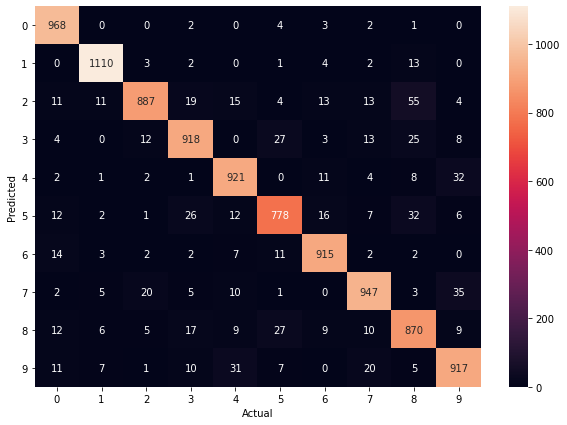

In [21]:
import seaborn as sns
plt.figure(figsize=(10,7))

sns.heatmap(cm,annot=True, fmt='d')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.yticks(rotation=0)

In [22]:
plt.savefig("Phase1 Customer Churn.png")

<Figure size 432x288 with 0 Axes>

### Phase2: Initialize model- changed hyperparameters as: 2 layers using relu activation function at first layer and sigmoid at outer layer. 

In [23]:
model=keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='adam', 
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(X_train,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4620 - accuracy: 0.8660
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1367 - accuracy: 0.9595
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0900 - accuracy: 0.9735
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0682 - accuracy: 0.9798
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0499 - accuracy: 0.9847


### Predicting y from phase 2 trainings and evaluate the results

In [24]:
y_predicted1=model.predict(X_test)

In [25]:
y_predicted1[0]

array([1.0572374e-03, 6.8258742e-05, 5.7429641e-01, 9.8136055e-01,
       9.4567495e-06, 4.9067706e-02, 4.5472981e-09, 9.9999058e-01,
       6.5772235e-03, 1.1089262e-01], dtype=float32)

In [26]:
np.argmax(y_predicted1[0])

7

In [27]:
y_predicted1= [np.argmax(i) for i in y_predicted1]

In [28]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0859 - accuracy: 0.9745


[0.08589692413806915, 0.9745000004768372]

### Confusion matrix for phase 2.

In [29]:
cm=tf.math.confusion_matrix(y_test,y_predicted1)

In [30]:
cm


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 974,    0,    0,    0,    0,    1,    2,    1,    2,    0],
       [   1, 1125,    4,    1,    0,    1,    2,    0,    1,    0],
       [   5,    0, 1013,    1,    1,    0,    3,    3,    6,    0],
       [   1,    1,    8,  992,    0,    0,    2,    3,    3,    0],
       [   3,    0,    7,    0,  960,    1,    3,    1,    1,    6],
       [   3,    0,    0,   12,    0,  865,    8,    0,    3,    1],
       [   6,    2,    2,    1,    3,    2,  940,    0,    2,    0],
       [   2,    3,   12,    5,    0,    0,    0, 1001,    2,    3],
       [   7,    0,   11,    6,    2,    3,    4,    2,  937,    2],
       [   6,    6,    4,   12,   15,   11,    1,   10,    6,  938]])>

### Visualization for phase 2 trainings

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0, 0.5, '0'),
  Text(0, 1.5, '1'),
  Text(0, 2.5, '2'),
  Text(0, 3.5, '3'),
  Text(0, 4.5, '4'),
  Text(0, 5.5, '5'),
  Text(0, 6.5, '6'),
  Text(0, 7.5, '7'),
  Text(0, 8.5, '8'),
  Text(0, 9.5, '9')])

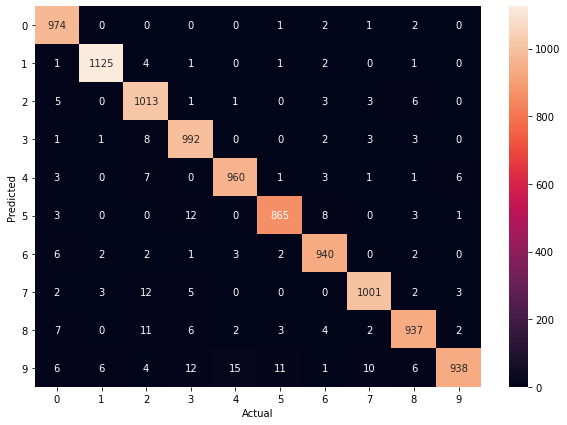

In [40]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.yticks(rotation=0)

In [32]:
plt.savefig("MNIST Seaborn Heatmap.png")

<Figure size 432x288 with 0 Axes>